<a href="https://colab.research.google.com/github/najwarahma/Visi-Komputer2025/blob/main/Praktikum%202%20Klasifikasi%20Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1-Memulai klasifikasi gambar dengan dataset sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


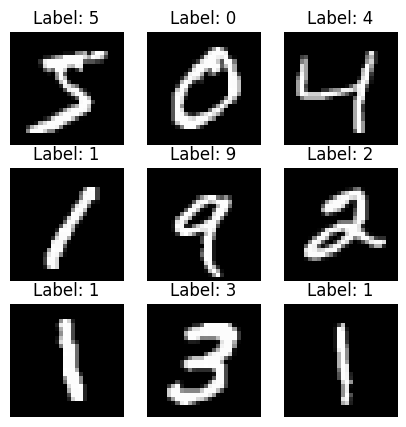

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

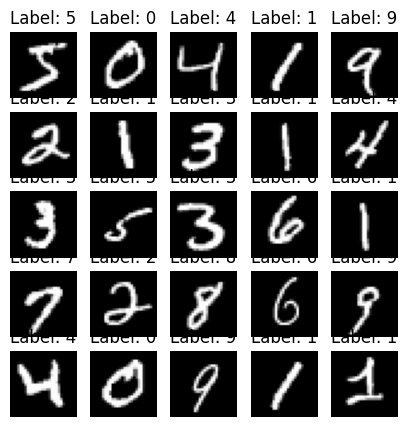

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Praktikum D2-Klasifikasi gambar dengan model machine learning tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat

# Prediksi
y_pred = clf.predict(x_test_flat)

print ("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat

# Prediksi
y_pred = clf.predict(x_test_flat)

print ("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513



Praktikum D3–Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8972 - loss: 0.3505 - val_accuracy: 0.9805 - val_loss: 0.0730
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9810 - loss: 0.0620 - val_accuracy: 0.9877 - val_loss: 0.0526
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9877 - val_loss: 0.0448
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9924 - loss: 0.0258 - val_accuracy: 0.9882 - val_loss: 0.0493
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 16ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9862 - val_loss: 0.0590


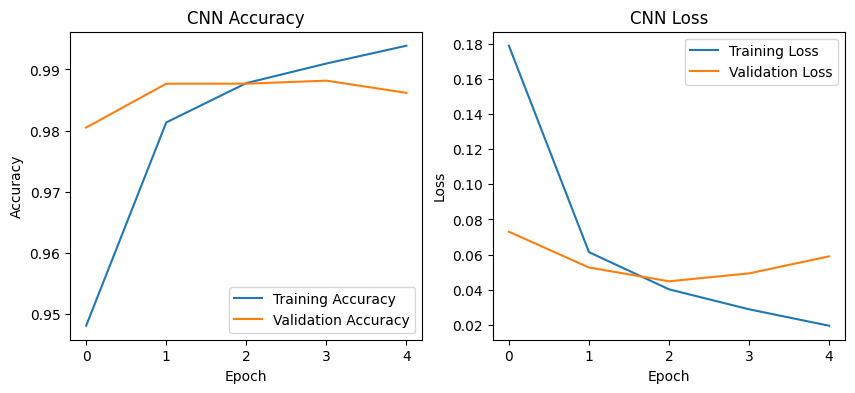

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.8917 - loss: 0.3476 - val_accuracy: 0.9838 - val_loss: 0.0524
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9842 - loss: 0.0526 - val_accuracy: 0.9885 - val_loss: 0.0448
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9901 - loss: 0.0325 - val_accuracy: 0.9902 - val_loss: 0.0374
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9883 - val_loss: 0.0428


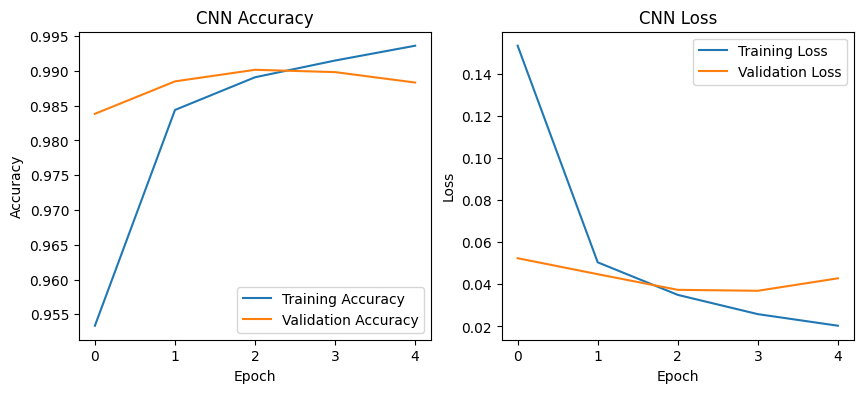

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ======= plot history =======
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.3671 - loss: 1.7452 - val_accuracy: 0.5614 - val_loss: 1.2216
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5883 - loss: 1.1694 - val_accuracy: 0.6386 - val_loss: 1.0492
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.6386 - loss: 1.0307 - val_accuracy: 0.6614 - val_loss: 0.9815
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 42ms/step - accuracy: 0.6759 - loss: 0.9367 - val_accuracy: 0.6472 - val_loss: 1.0128
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 37ms/step - accuracy: 0.6962 - loss: 0.8694 - val_accuracy: 0.6816 - val_loss: 0.9198
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7151 - loss: 0.8099 - val_accuracy: 0.6988 - val_loss: 0.8812
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7370 - loss: 0.7582 - val_accuracy: 0.6942 - val_loss: 0.9069
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7507 -

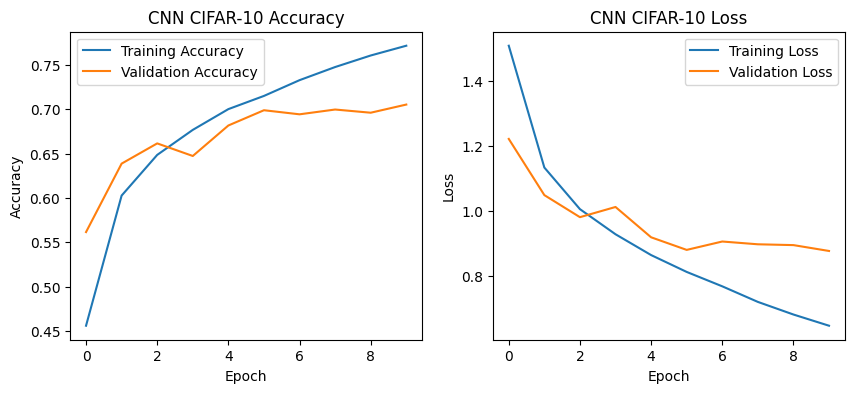

In [6]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.2823 - loss: 1.9275 - val_accuracy: 0.5256 - val_loss: 1.3175
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.4770 - loss: 1.4425 - val_accuracy: 0.5906 - val_loss: 1.1555
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.5360 - loss: 1.2985 - val_accuracy: 0.6162 - val_loss: 1.1069
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5702 - loss: 1.2229 - val_accuracy: 0.6470 - val_loss: 1.0340
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.5908 - loss: 1.1538 - val_accuracy: 0.6626 - val_loss: 0.9899


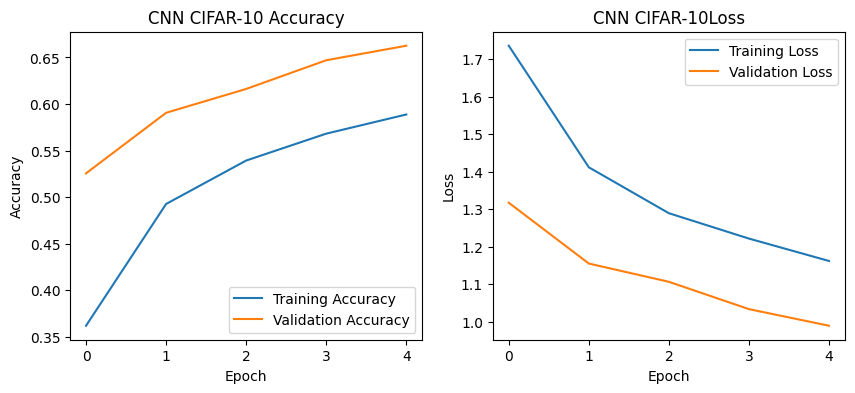

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ====== plot history ======
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D5 Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 589s 416ms/step - accuracy: 0.4560 - loss: 1.5598 - val_accuracy: 0.5760 - val_loss: 1.2128
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 602s 402ms/step - accuracy: 0.5822 - loss: 1.2072 - val_accuracy: 0.5722 - val_loss: 1.1895
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 623s 403ms/step - accuracy: 0.6006 - loss: 1.1447 - val_accuracy: 0.6026 - val_loss: 1.1366
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 539s 383ms/step - accuracy: 0.6158 - loss: 1.0955 - val_accuracy: 0.6016 - val_loss: 1.1303
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 594s 406ms/step - accuracy: 0.6289 - loss: 1.0595 - val_accuracy: 0.6050 - val_loss: 1.1196


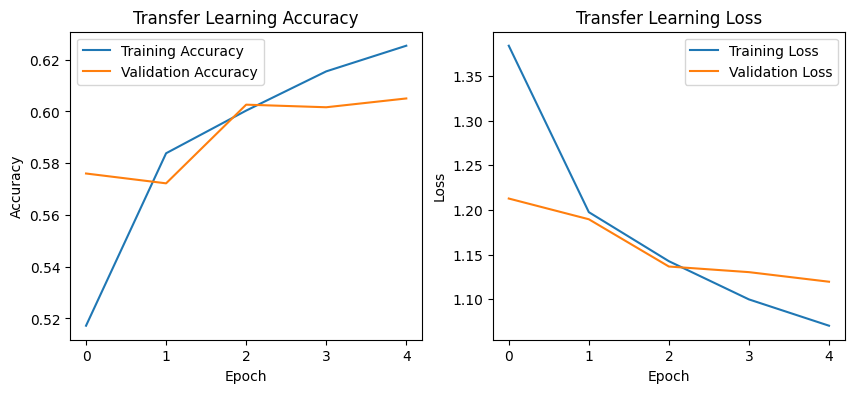

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load base model VGG16 (tanpa top layer)
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32, 32, 3))

# Freeze base model (tidak dilatih ulang)
base_model.trainable = False

# Definisi model dengan transfer learning
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 569s 404ms/step - accuracy: 0.4535 - loss: 1.5619 - val_accuracy: 0.5726 - val_loss: 1.2289
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 617s 401ms/step - accuracy: 0.5811 - loss: 1.2036 - val_accuracy: 0.5866 - val_loss: 1.1557
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 631s 407ms/step - accuracy: 0.5972 - loss: 1.1528 - val_accuracy: 0.5970 - val_loss: 1.1478
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 616s 403ms/step - accuracy: 0.6140 - loss: 1.1082 - val_accuracy: 0.6124 - val_loss: 1.1233
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 622s 403ms/step - accuracy: 0.6249 - loss: 1.0712 - val_accuracy: 0.6068 - val_loss: 1.1234
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 632s 447ms/step - accuracy: 0.6519 - loss: 1.0015 - val_accuracy: 0.6364 - val_loss: 1.0421
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 627s 446ms/step - accuracy: 0.6857 - loss: 0.9040 - val_accuracy: 0.6478 - val_loss: 1.0032
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 686s 449ms/step - accuracy: 

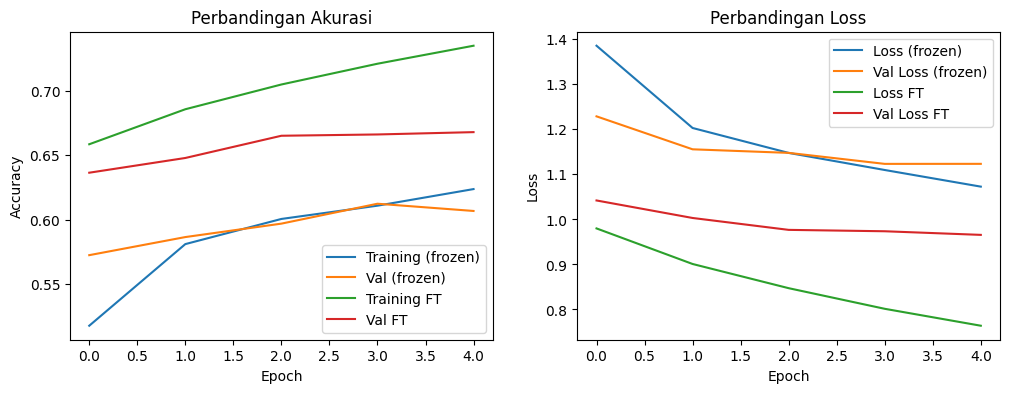

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ==== Load base model VGG16 (tanpa top layer) ====
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32, 32, 3))

# --- Tahap 1: Bekukan seluruh base_model ---
base_model.trainable = False

# ==== Definisi model awal ====
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi dan training awal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.1)

# ==========================
# Tahap 2: Fine-tuning
# ==========================
# Aktifkan 2 lapisan terakhir pada base_model
base_model.trainable = True
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Kompilasi ulang dengan learning rate lebih kecil
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_ft = model.fit(x_train, y_train,
                       epochs=5,
                       validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training (frozen)')
plt.plot(history.history['val_accuracy'], label='Val (frozen)')
plt.plot(history_ft.history['accuracy'], label='Training FT')
plt.plot(history_ft.history['val_accuracy'], label='Val FT')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (frozen)')
plt.plot(history.history['val_loss'], label='Val Loss (frozen)')
plt.plot(history_ft.history['loss'], label='Loss FT')
plt.plot(history_ft.history['val_loss'], label='Val Loss FT')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D6 Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step
              precision    recall  f1-score   support

           0       0.75      0.68      0.72      1000
           1       0.74      0.74      0.74      1000
           2       0.56      0.59      0.58      1000
           3       0.50      0.45      0.47      1000
           4       0.54      0.65      0.59      1000
           5       0.57      0.56      0.57      1000
           6       0.69      0.69      0.69      1000
           7       0.72      0.70      0.71      1000
           8       0.75      0.81      0.78      1000
           9       0.75      0.68      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



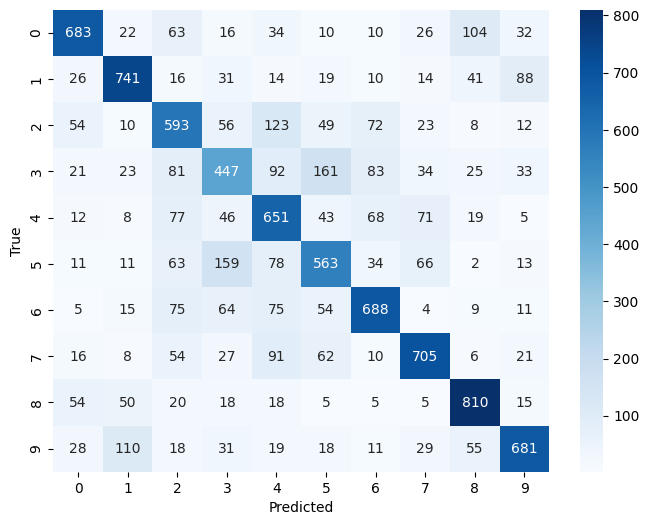

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

PENUGASAN

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Bangun CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.8709 - loss: 0.4047 - val_accuracy: 0.9829 - val_loss: 0.0532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9772 - loss: 0.0778 - val_accuracy: 0.9893 - val_loss: 0.0291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9844 - loss: 0.0535 - val_accuracy: 0.9889 - val_loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9904 - val_loss: 0.0317
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9915 - val_loss: 0.0248


In [12]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-
# hitam) =====

import numpy as np
from PIL import Image, ImageOps
def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar
    jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)
    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi
    # putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)
    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))
    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size
    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))
    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1)

    arr = arr[..., None]
    return canvas, arr

Saving 1.jpg to 1 (1).jpg
Saving 2.jpg to 2.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg


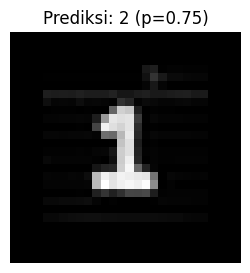

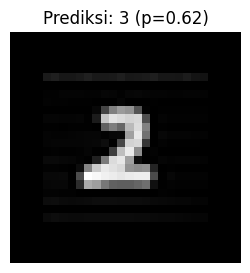

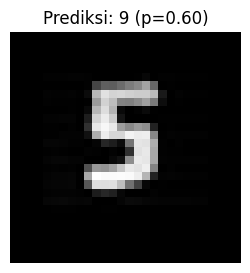

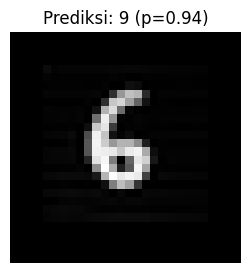


Rekap Prediksi (CNN):
- 1 (1).jpg -> 2 (p=0.751)
- 2.jpg -> 3 (p=0.622)
- 5.jpg -> 9 (p=0.603)
- 6.jpg -> 9 (p=0.939)


In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Pilihan A: Prediksi dengan CNN dari D3
# Pastikan Anda sudah menjalankan D3 dan memiliki variabel 'model' (Keras) terlatih pada MNIST.

results = []
if 'model' not in locals():
    print("FATAL ERROR: Variabel 'model' (CNN) tidak ditemukan. Pastikan Anda sudah melatih model di praktikum D3.")
else:
    for fname in uploaded.keys():
        try:
            img_pil = Image.open(fname)
        except Exception as e:
            print(f"Error saat membuka file {fname}: {e}")
            continue

        # disp: PIL untuk ditampilkan, x: (28,28,1)
        disp, x = preprocess_to_mnist_28x28(img_pil)

        # Ubah ke shape yang dibutuhkan CNN: (1, 28, 28, 1)
        x_batch = np.expand_dims(x, axis=0)

        # Prediksi menggunakan model CNN (Keras)
        probs = model.predict(x_batch, verbose=0)[0]
        pred = int(np.argmax(probs))
        conf = float(np.max(probs))

        results.append((fname, pred, conf))

        # Tampilkan hasil
        plt.figure(figsize=(3,3))
        plt.imshow(disp, cmap='gray')
        plt.title(f"Prediksi: {pred} (p={conf:.2f})")
        plt.axis('off')
        plt.show()

    # Rekap ringkas
    print("\nRekap Prediksi (CNN):")
    for r in results:
        print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")